# Análise Ranking CCONF
Neste notebook vamos analisar a aba municípios da planilha que contém os dados sobre a aplicação dos critérios elaborados pela CCONF. Vamos lá!

## Preparação: importando os dados da planilha
Começamos importando os dados da planilha para dentro de um Data Frame para podermos manipulá-los no python:

Vamos criar duas variáveis que guardam as colunas que: 
a) São relacionadas à capag:
b) Não são relacionadas à capag

In [56]:
col_capag = "BV, BZ,S:W, Y:AA, AL:AN, AS, AU: BA, BD:BF, BM, BO, BQ, BS, BU"
col_nao_capag = "BV, BZ, B:R,X,AB:AK, AO:AR, AT, BB:BC, BG:BL, BN, BP, BR, BT"
col_gerais = "A,BV, BW,BX,BY,BZ, CA"
col_id = "A"

Criando os Data Frames usando a library pandas

In [57]:
import pandas as pd
import numpy as np

data_capag = pd.read_excel(r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_capag , skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"] )
#print(data_capag.dtypes)
print(data_capag.shape)
#print(data_capag.head(5))

data_nao_capag = pd.read_excel(r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols =  col_nao_capag , skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_nao_capag.dtypes)
print(data_nao_capag.shape)
#print(data_nao_capag.head(5))

data_total = pd.read_excel(r'./assets/Testes_Ranking_CCONF_2020-CAPAG.xlsx', 'Municípios', usecols = col_nao_capag + col_capag, skipfooter = 1, dtype = {"Capital?":bool},true_values = ["Sim"],false_values = ["Não"])
#print(data_total.dtypes)
print(data_total.shape)
#print(data_total.head(5))

(5568, 29)
(5568, 47)
(5568, 73)


## Análise Exploratória
Antes de tudo, vamos criar uma função para calcular a função de distribuição acumulada, ela será útil para entendermos a dinâmica de como os entes passam ou não em cada grupo de testes

In [58]:
def ecdf(data):
    """Calcular a função de distribuição cumulativa (FDC) for a one-dimensional array of measurements."""
    # Número de pontos de dados: n
    n = len(data)
    # dados do eixo X para o FDC : x
    x = np.sort(data)
    # dados do eixo y para o FDC: y
    y = np.arange(1, n+1) / n
    return x, y

a.	Qual a média/proporção de cada um dos testes?

In [59]:
medias_total = data_total.mean(axis=0)
print(medias_total)

D1_00001    0.974282
D1_00002    0.848420
D1_00003    0.967187
D1_00004    0.954921
D1_00005    0.000000
              ...   
D4_00011         NaN
D4_00012    0.531070
D4_00013         NaN
D4_00014    0.612069
D4_00016    0.530891
Length: 71, dtype: float64


a.1	Qual a média/proporção de cada um dos testes não capag?

In [60]:
medias_ncapag = data_nao_capag.mean(axis=0)
print(medias_ncapag)

D1_00001    0.974282
D1_00002    0.848420
D1_00003    0.967187
D1_00004    0.954921
D1_00005    0.000000
D1_00006    0.461512
D1_00007    0.573994
D1_00008    0.437518
D1_00009    0.463578
D1_00010    0.000000
D1_00011    0.910973
D1_00012    0.843858
D1_00013    0.872953
D1_00014    0.952191
D1_00015    0.000000
D2_00001    0.580280
D2_00002    0.303161
D2_00008    0.834231
D2_00013    0.791487
D2_00014    0.816451
D2_00015    0.823815
D2_00016         NaN
D2_00017         NaN
D2_00018         NaN
D2_00019    0.818068
D2_00020         NaN
D2_00021         NaN
D2_00022    0.778915
D2_00029    0.728448
D2_00030    0.749102
D2_00031    0.746588
D2_00032    0.222881
D3_00001    0.560165
D3_00010    0.564296
D3_00011    0.807471
D4_00002    0.502874
D4_00003    0.498204
D4_00004    0.732938
D4_00005    0.410560
D4_00006    0.456178
D4_00007    0.478807
D4_00009         NaN
D4_00011         NaN
D4_00013         NaN
D4_00015         NaN
dtype: float64


a.1	Qual a média/proporção de cada um dos testes  capag?

In [61]:
medias_capag = data_capag.mean(axis=0)
print(medias_capag)

D2_00003    0.750000
D2_00004    0.800647
D2_00005    0.826868
D2_00006    0.834231
D2_00007    0.833693
D2_00010    0.830819
D2_00011    0.829741
D2_00012    0.739224
D2_00023    0.827945
D2_00024    0.828305
D2_00028    0.728269
D2_00033    0.736710
D3_00002    0.796516
D3_00003    0.751616
D3_00005    0.772270
D3_00006    0.400682
D3_00007    0.732759
D3_00008    0.543103
D3_00009    0.510955
D3_00012    0.910560
D3_00013    0.836207
D4_00001    0.549389
D4_00008    0.686422
D4_00010    0.558728
D4_00012    0.531070
D4_00014    0.612069
D4_00016    0.530891
dtype: float64


b.	Qual a distribuição das notas (somatório de todas as colunas)?
i.	Levando em consideração apenas os testes da CAPAG (colunas em amarelo)

0       27
1       27
2       27
3       27
4       27
        ..
5563     0
5564     0
5565     0
5566     0
5567     0
Name: sum, Length: 5568, dtype: int64


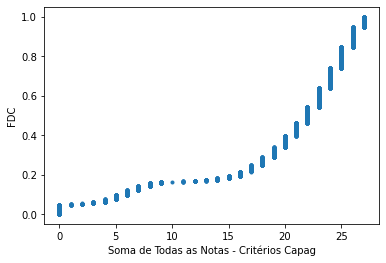

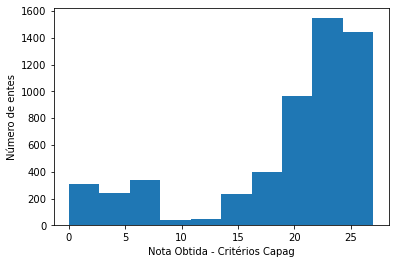

In [62]:
if "sum" in data_capag:
     data_capag["sum"].values[:] = 0
data_capag["sum"] = data_capag.sum(axis=1)
print(data_capag["sum"])
#Plotando a  função de distribuição cumulativa (FDC): vamos gerar as variáveis  x_dist, y_dist. A primeira terá 
#todas as notas acumuladas, da menor até a maior. 
import matplotlib.pyplot as plt
x_dist, y_dist = ecdf(data_capag['sum'])
# Greando o plot
_= plt.plot(x_dist, y_dist, marker = ".", linestyle = 'none')
# Rotulando os eixos
_= plt.xlabel('Soma de Todas as Notas - Critérios Capag')
_= plt.ylabel('FDC')
# Mostrando o plot
plt.show()
#plotando o histograma da coluna das notas
_=plt.hist(data_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
ii.	Levando em consideração apenas os testes que não são da CAPAG (colunas não pintadas)

0       33.0
1       32.8
2       32.6
3       32.6
4       32.5
        ... 
5563     1.0
5564     1.0
5565     1.0
5566     0.8
5567     0.8
Name: sum, Length: 5568, dtype: float64


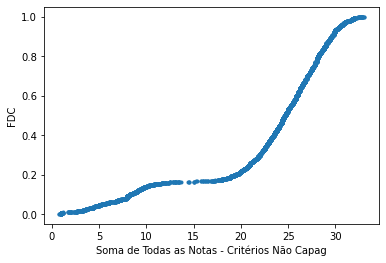

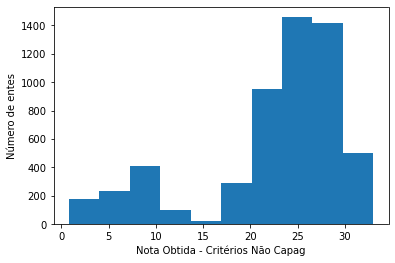

In [63]:
if "sum" in data_nao_capag:
     data_nao_capag["sum"].values[:] = 0
data_nao_capag["sum"] = data_nao_capag.sum(axis=1)
print(data_nao_capag["sum"])

#Plotando a  função de distribuição cumulativa (FDC): vamos gerar as variáveus  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 

import matplotlib.pyplot as plt
x_dist_nc, y_dist_nc = ecdf(data_nao_capag['sum'])
_= plt.plot(x_dist_nc, y_dist_nc, marker = ".", linestyle = 'none')
_= plt.xlabel('Soma de Todas as Notas - Critérios Não Capag')
_= plt.ylabel('FDC')
plt.show()

#plotando o histograma da coluna das notas
_=plt.hist(data_nao_capag['sum'])
_=plt.xlabel('Nota Obtida - Critérios Não Capag')
_=plt.ylabel('Número de entes')
plt.show()

b.	Qual a distribuição das notas (somatório de todas as colunas)?
iii.	Levando em consideração todos os testes

0       60.0
1       59.8
2       59.6
3       59.6
4       59.5
        ... 
5563     1.0
5564     1.0
5565     1.0
5566     0.8
5567     0.8
Name: sum, Length: 5568, dtype: float64


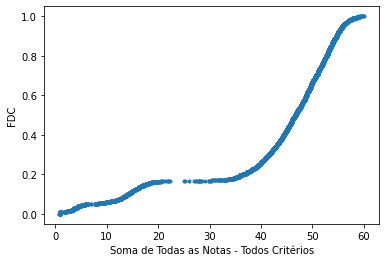

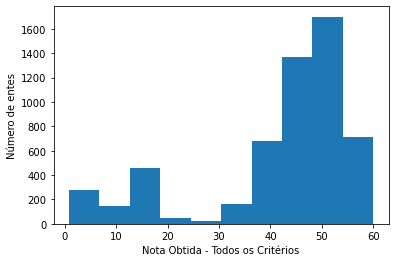

In [64]:
if "sum" in data_total:
     data_total["sum"].values[:] = 0
data_total["sum"] = data_total.sum(axis=1)
print(data_total["sum"])

#Plotando a função de distribuição cumulativa (FDC): vamos gerar as variáveis  x_dist, y_dist. A primeira, terá 
#todas as notas acumuladas, da menor até a maior. 
import matplotlib.pyplot as plt
x_dist_total, y_dist_total = ecdf(data_total['sum'])
_= plt.plot(x_dist_total, y_dist_total, marker = ".", linestyle = 'none')
_= plt.xlabel('Soma de Todas as Notas - Todos Critérios')
_= plt.ylabel('FDC')
plt.show()
#plotando o histograma da coluna das notas
_=plt.hist(data_total['sum'])
_=plt.xlabel('Nota Obtida - Todos os Critérios')
_=plt.ylabel('Número de entes')
plt.show()

## Simulações de classificação 
Vamos agora realizar 3 tipos de simulações. 

### a.	Alternativa I: classificação conjunta em duas etapas

#### i.	Primeiro,  somando todos os testes relacionados à CAPAG

##### i.	1.	Caso o município tenha resultado maior ou igual a x, classifique-o na zona 1

In [65]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outra nota de corte.
nota_corte_capag = 24

if 'Aprovado' in data_capag:
     data_capag['Aprovado'].values[:] = 0

#Gerando a coluna com os aprovados 

data_capag['Aprovado'] = np.where(data_capag["sum"]>= nota_corte_capag, True, False)
#print(data_capag['Aprovado'].head(200))

# Calculando o percentual de aprovados 
n_entes = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados = sum(data_capag['Aprovado'])
print('O número de entes de aprovados na zona 1 com nota de corte de ' + str(nota_corte_capag) + ' seria de: ' + str(num_aprovados))
print('O percentual de aprovados na zona 1 seria de : ' + "{:.2%}".format(num_aprovados/n_entes))

Total de Entes :5568
O número de entes de aprovados na zona 1 com nota de corte de 24 seria de: 2006
O percentual de aprovados na zona 1 seria de : 36.03%


#### ii.	Somando os testes não relacionados à CAPAG
##### 1.	Se o ente estiver na zona 1
    a.	Caso o ente tenha resultado maior ou igual a y1, classifique-o com nota final A
    b.	Caso o ente tenha resultado maior ou igual a y2 e menor que y1, classifique-o com nota final B
    c.	Caso o ente tenha resultado menor que y3, classifique-o com nota final C (erro: tenha resultado menor do que y2)
##### 2.	Se o ente estiver na zona 2
    a.	Caso o ente tenha resultado maior ou igual a y3, classifique-o com nota final D
    b.	Caso o ente tenha resultado menor que y3, classifique-o com nota final E

In [66]:
# Selecionando a coluna dos aprovados/reprovados na zona 1
df_aprovados = data_capag.Aprovado
# Trazendo a coluna dos aprovados nos critérios de Capag (zona 1) para o Data Frame que contém os critérios não relacionados à Capag 
data_nao_capag_c_a = pd.concat([data_nao_capag, df_aprovados], axis=1)
#verificando a concatenação
data_nao_capag_c_a.columns
print(data_nao_capag_c_a.head(3))
# calculando a nota dos critérios não capag
#>>>> ALETERE OS VALORES ABAIXO para simular com outras notas de CORTE
nota_corte_y1 = 28
nota_corte_y2 = 20
nota_corte_y3 = 15

# criando a lista das 5 condições
conditions = [
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y1),
    (data_nao_capag_c_a['Aprovado'] ) & ((data_nao_capag_c_a['sum'] < nota_corte_y1) & (data_nao_capag_c_a['sum'] >= nota_corte_y2)),
    (data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] <  nota_corte_y2),        
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] >= nota_corte_y3),
    (~ data_nao_capag_c_a['Aprovado'] ) & (data_nao_capag_c_a['sum'] < nota_corte_y3)
    ]
# criando a lista de valores que queremos associar a cada condição
values = ['A', 'B', 'C', 'D', 'E']

if 'capag' in data_nao_capag_c_a:
     data_nao_capag_c_a['capag'].values[:] = 0

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_nao_capag_c_a['capag'] = np.select(conditions, values)


   D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  D1_00007  \
0       1.0         1       1.0       1.0         0       1.0         1   
1       1.0         1       1.0       1.0         0       1.0         1   
2       1.0         1       1.0       1.0         0       1.0         1   

   D1_00008  D1_00009  D1_00010  ...  D4_00006  D4_00007  D4_00009  D4_00011  \
0       1.0       1.0         0  ...         1         1       NaN       NaN   
1       1.0       1.0         0  ...         1         1       NaN       NaN   
2       1.0       1.0         0  ...         1         1       NaN       NaN   

   D4_00013  D4_00015                  Ente  UF   sum  Aprovado  
0       NaN       NaN           Águas Frias  SC  33.0      True  
1       NaN       NaN  Santana da Boa Vista  RS  32.8      True  
2       NaN       NaN        Senador Amaral  MG  32.6      True  

[3 rows x 49 columns]


In [67]:
# Mostrando a Tabela final com a classificação
#data_nao_capag_c_a.head(10)
#Mostrando a quantidade de entes em cada classe de nota por estado
class_alt1 = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size').reset_index().sort_values(['UF', 'capag'], ascending=[True, True])
print(class_alt1)
# Mostrando a quantidade de entes por UF
#uf = data_nao_capag_c_a.groupby(['UF']).size().to_frame('size')
#print (uf)
# Fazendo a divisão final para mostrar as notas por UF em termos percentuais. 
c = data_nao_capag_c_a.groupby(['UF', 'capag']).size().to_frame('size')
class_alt1_final = c / c.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 1 - Percentuais por Estado

print (class_alt1_final)

     UF capag  size
0    AC     A     2
1    AC     B     4
2    AC     D     8
3    AC     E     8
4    AL     B     3
..   ..   ...   ...
98   SP     D   237
99   SP     E    46
100  TO     B     2
101  TO     D   105
102  TO     E    32

[103 rows x 3 columns]
              size
UF capag          
AC A      0.090909
   B      0.181818
   D      0.363636
   E      0.363636
AL B      0.029412
...            ...
SP D      0.367442
   E      0.071318
TO B      0.014388
   D      0.755396
   E      0.230216

[103 rows x 1 columns]


###### Exportando a simulação da alternativa 1 para o Excel

In [68]:
with pd.ExcelWriter('sim_alt1_c_dados.xlsx') as writer:  
    class_alt1.to_excel(writer, sheet_name='Res_Simul_1')
    class_alt1_final.to_excel(writer, sheet_name='Res_F_Simul_1')
    data_nao_capag_c_a.to_excel(writer, sheet_name='Dados_Simul_1')

### b.	Alternativa II: classificação dupla (AA, AB etc)

#### i.	 Primeiro, somando todos os testes relacionados à CAPAG
    1.	Caso o município tenha resultado maior ou igual a z, classifique-o com a primeira entrada “A”
    2.	Caso contrário, primeira entrada “B”

In [69]:
#>>>>> ALTERE A VARIÁVEL ABAIXO e pressione "CTRL + ENTER" para simular com outra nota de corte.
nota_corte_capag_z = 10

if 'Aprovado_II_A' in data_capag:
     data_capag['Aprovado_II_A'].values[:] = 0

#Gerando a coluna com os aprovados 
data_capag['Aprovado_II_A'] = np.where(data_capag["sum"]>= nota_corte_capag_z, True, False)
#print(data_capag['Aprovado'].head(200))

# Calculando o percentual de aprovados 
n_entes_II = data_capag.shape[0]
print('Total de Entes :' + str(n_entes))
num_aprovados_II = sum(data_capag['Aprovado_II_A'])
print('O número de entes de aprovados - classificação A - com nota de corte de ' + str(nota_corte_capag_z) + ' seria de: ' + str(num_aprovados_II))
print('O percentual de aprovados com classificação A seria de : ' + "{:.2%}".format(num_aprovados_II/n_entes_II))

print (data_capag)

Total de Entes :5568
O número de entes de aprovados - classificação A - com nota de corte de 10 seria de: 4645
O percentual de aprovados com classificação A seria de : 83.42%
      D2_00003  D2_00004  D2_00005  D2_00006  D2_00007  D2_00010  D2_00011  \
0            1         1         1         1         1         1         1   
1            1         1         1         1         1         1         1   
2            1         1         1         1         1         1         1   
3            1         1         1         1         1         1         1   
4            1         1         1         1         1         1         1   
...        ...       ...       ...       ...       ...       ...       ...   
5563         0         0         0         0         0         0         0   
5564         0         0         0         0         0         0         0   
5565         0         0         0         0         0         0         0   
5566         0         0         0         0 

#### ii. Depois, somando todos os testes (inclusive os da CAPAG)
    1.	Caso o ente tenha nota maior ou igual a k1, classifique-o com a segunda entrada “A”
    2.	Caso o ente tenha nota menor que k1, mas maior ou igual a k2, classifique-o com a segunda entrada “B”
    3.	Caso o ente tenha nota menor que k2, classifique-o com a segunda entrada “C”
#### iii. Depois, combinando a primeira entrada com a segunda. Registre o resultado


In [75]:
# Selecionando a coluna dos aprovados - classificação A
df_aprovados_total = data_capag.Aprovado_II_A
# Trazendo a coluna dos aprovados no critério classificação A para o Data Frame que contém os todos os critérios da CCONF (Capag e Não Capag)
data_total_c_a = pd.concat([data_total, df_aprovados_total], axis=1)
#verificando a concatenação
data_total_c_a.columns
print(data_total_c_a.head(3))
# calculando a nota com todos os critérios
#>>>> ALETERE OS VALORES ABAIXO para simular com outras notas de CORTE
nota_corte_k1 = 40
nota_corte_k2 = 70

# criando a lista das 5 condições
conditions = [
    (data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] >= nota_corte_k1),
    (data_total_c_a['Aprovado_II_A'] ) & ((data_total_c_a['sum'] < nota_corte_k1) & (data_total_c_a['sum'] >= nota_corte_k2)),
    (data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] <  nota_corte_k2),        
    (~ data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] >= nota_corte_k1),
    (~ data_total_c_a['Aprovado_II_A'] ) & ((data_total_c_a['sum'] < nota_corte_k1) & (data_total_c_a['sum'] >= nota_corte_k2)),
    (~ data_total_c_a['Aprovado_II_A'] ) & (data_total_c_a['sum'] <  nota_corte_k2)           
    ]
# criando a lista de valores que queremos associar a cada condição
values = ['AA', 'AB', 'AC', 'BA', 'BB', 'BC']

# criando uma nova coluna e usando o np.select para associar os valores usando nossa lista como argumento
data_total_c_a['capag_II'] = np.select(conditions, values)

# Mostrando a Tabela final com a classificação
#data_total_c_a.head(10)
# Mostrando a quantidade de entes em cada classe de nota por estado
class_alt2 = data_total_c_a.groupby(['UF', 'capag_II']).size().to_frame('size').reset_index().sort_values(['UF', 'capag_II'], ascending=[True, True])
print(class_alt2)
# Mostrando a quantidade de entes por UF
#uf_2 = data_total_c_a.groupby(['UF']).size().to_frame('size')
#print (uf_2)
# Fazendo a divisão final para mostrar as notas por UF em termos percentuais. 
c_2 = data_total_c_a.groupby(['UF', 'capag_II']).size().to_frame('size')
class_alt2_final = c_2 / c_2.groupby(level=0).sum()

###### Tabela de Classificação Final - Alternativa 2 - Percentuais por Estado

print (class_alt2_final)

   D1_00001  D1_00002  D1_00003  D1_00004  D1_00005  D1_00006  D1_00007  \
0       1.0         1       1.0       1.0         0       1.0         1   
1       1.0         1       1.0       1.0         0       1.0         1   
2       1.0         1       1.0       1.0         0       1.0         1   

   D1_00008  D1_00009  D1_00010  ...  D4_00010  D4_00011  D4_00012  D4_00013  \
0       1.0       1.0         0  ...         1       NaN         1       NaN   
1       1.0       1.0         0  ...         1       NaN         1       NaN   
2       1.0       1.0         0  ...         1       NaN         1       NaN   

   D4_00014  D4_00016                  Ente  UF   sum  Aprovado_II_A  
0         1         1           Águas Frias  SC  60.0           True  
1         1         1  Santana da Boa Vista  RS  59.8           True  
2         1         1        Senador Amaral  MG  59.6           True  

[3 rows x 75 columns]
    UF capag_II  size
0   AC       AA    14
1   AC       BC     8
2   A

###### Exportando a simulação da alternativa 2 para o Excel

In [71]:
with pd.ExcelWriter('sim_alt2_c_dados.xlsx') as writer:  
    class_alt2.to_excel(writer, sheet_name='Res_Simul_2')
    class_alt2_final.to_excel(writer, sheet_name='Res_F_Simul_2')
    data_total_c_a.to_excel(writer, sheet_name='Dados_Simul_2')

   
## Que informações podemos trazer dos pedidos de análise de CAPAG processados pela GERAP?

Vamos carregar agora os dados da planilha de controle de pedidos de CAPAG processados pela GERAP. Iniciamos carregando a planilha de controle de maneira similar ao que fizemos no início desta análise com os dados dos testes das dimensões da CCONF

In [ ]:
col_controle = "A,B,G "
data_controle = pd.read_excel(r'./assets/Controle de CAPAGS.xlsx', 'Dados', usecols =  col_controle , skipfooter = 0)
print(data_controle.dtypes)
print(data_controle.shape)
print(data_controle.head(5))